In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

**Link**: [Suicide Rates](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

In [3]:
df = pd.read_csv("data/master.csv")

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

- Russian and US have the highest total suicides from 1865 to 2015 but if we look using number suicides/100k population, Lithuania and Sri Lanka are the two highest score. It means these countries have a bad system in handling suicides. Need to consider too is Russia, because this country have suicides/100k population score number 3 highest in the world and number 1 in total suicides.
- Male have number of suicides/100k population higher than female. More than 60% total suicides in the world is male.
- Most people suicided at age 35 - 54 years while if we looked at number suicides/100k population, people who have age more than 75 tend to suicided. The lowest number total suicides and suicides/100k population is people who have age 5- 14 years.
- The G.I generation have the highest number suicides/100k population. The Greatest Generation, also known as the G.I. Generation and the World War II generation, is the demographic cohort following the Lost Generation and preceding the Silent Generation. The generation is generally defined as people born from 1901 to 1927. If we look, the new generation have lower number because this generation still in the beginning of their lives.
- Most of suicides number that happened in the world is around 100. There are some countries who had higher number it because the number of population from that country.
- Most countries have number population araound 100000 and 1000000.
- GDP per capita around 100 USD to 100000 USD.
- Total suicides around the world have a stagnant line year by year with the number suicides/100k population decline since year 2000. If we take a look deeper, the number had declined because the number of population tend to increase while the number of people who suicide decreased. It would be better if we can decrease the total suicide number too. Since 2010, the total suicide number always decrease than last year even there are some year where the number suicides/100k population going up.
- Just like what i have described above, if we looked suicides/100k population number, Lithuania and Sri Lanka have the highest number but they are not the country who have the highest average growth in suicides/100k population number.

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.rename(columns = {" gdp_for_year ($) ": "gdp_for_year",
                     "gdp_per_capita ($)": "gdp_per_capita"}, inplace = True)

In [6]:
df["gdp_for_year"] = df["gdp_for_year"].map(lambda x: int(x.replace(",", "")))

In [7]:
df = df.drop(["country-year", "HDI for year"], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   gdp_for_year       27820 non-null  int64  
 8   gdp_per_capita     27820 non-null  int64  
 9   generation         27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


In [9]:
df.nunique()

country                101
year                    32
sex                      2
age                      6
suicides_no           2084
population           25564
suicides/100k pop     5298
gdp_for_year          2321
gdp_per_capita        2233
generation               6
dtype: int64

In [10]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,1.812071e+13,126352.000000


In [11]:
df.describe(include = "object")

,country,sex,age,generation
count,27820,27820,27820,27820
unique,101,2,6,6
top,Austria,male,75+ years,Generation X
freq,382,13910,4642,6408


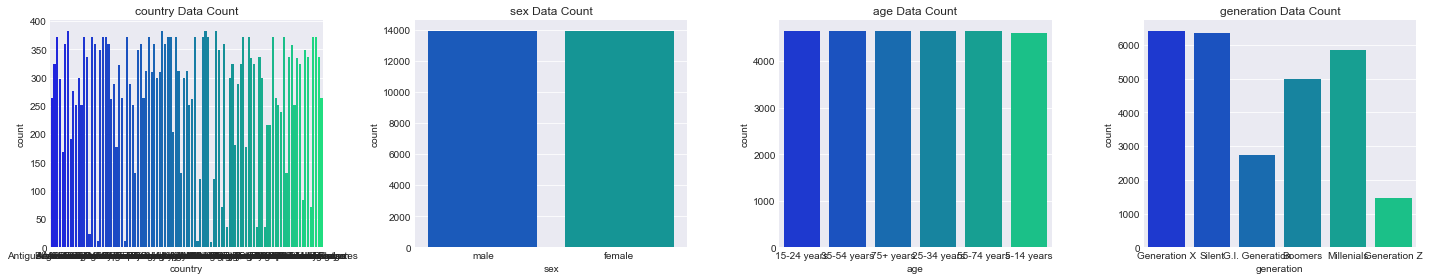

In [12]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
columns = df.select_dtypes(include = "object").columns
for col in range(len(columns)):
    sns.countplot(df[columns[col]], palette = "winter", ax = ax[col])
    ax[col].set_title(columns[col] + " Data Count")
plt.tight_layout()
plt.show()

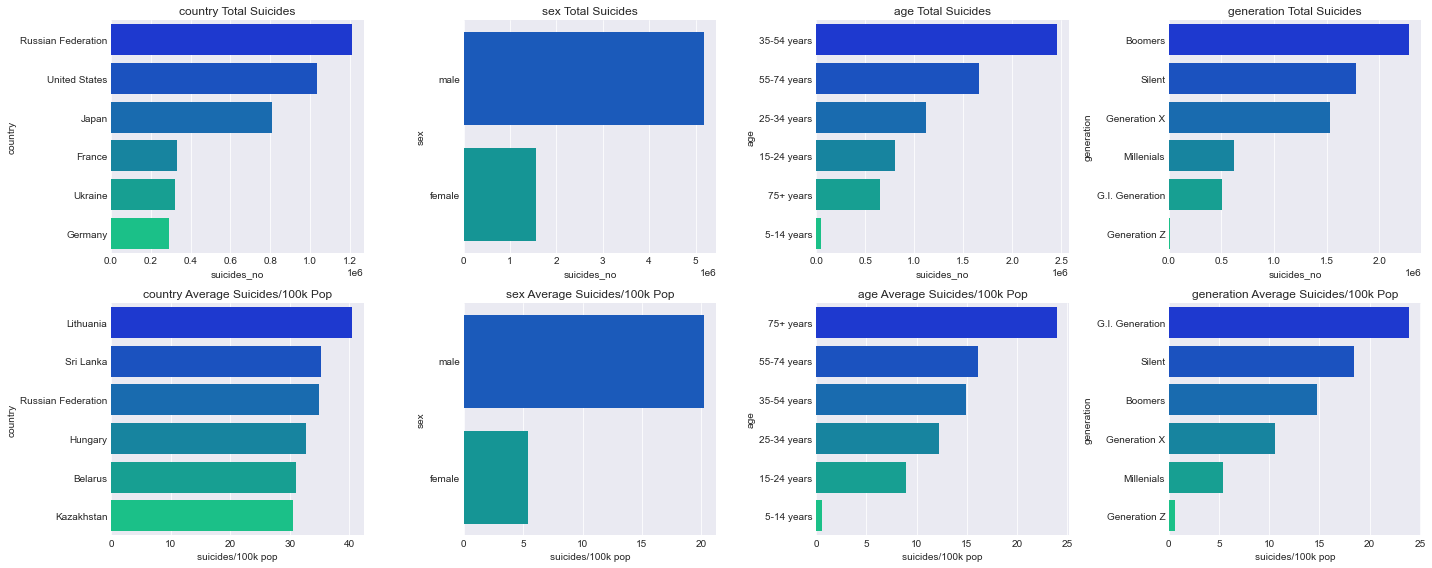

In [13]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = df.select_dtypes(include = "object").columns
for col in range(len(columns)):
    sns.barplot(x = "suicides_no", y = columns[col],
                data = df.groupby(columns[col]).sum().reset_index().sort_values("suicides_no", ascending = False).head(6),
                palette = "winter", ax = ax[0, col])
    ax[0, col].set_title(columns[col] + " Total Suicides")
    sns.barplot(x = "suicides/100k pop", y = columns[col],
                data = df.groupby(columns[col]).mean().reset_index().sort_values("suicides/100k pop", ascending = False).head(6),
                palette = "winter", ax = ax[1, col])
    ax[1, col].set_title(columns[col] + " Average Suicides/100k Pop")
plt.tight_layout()
plt.show()

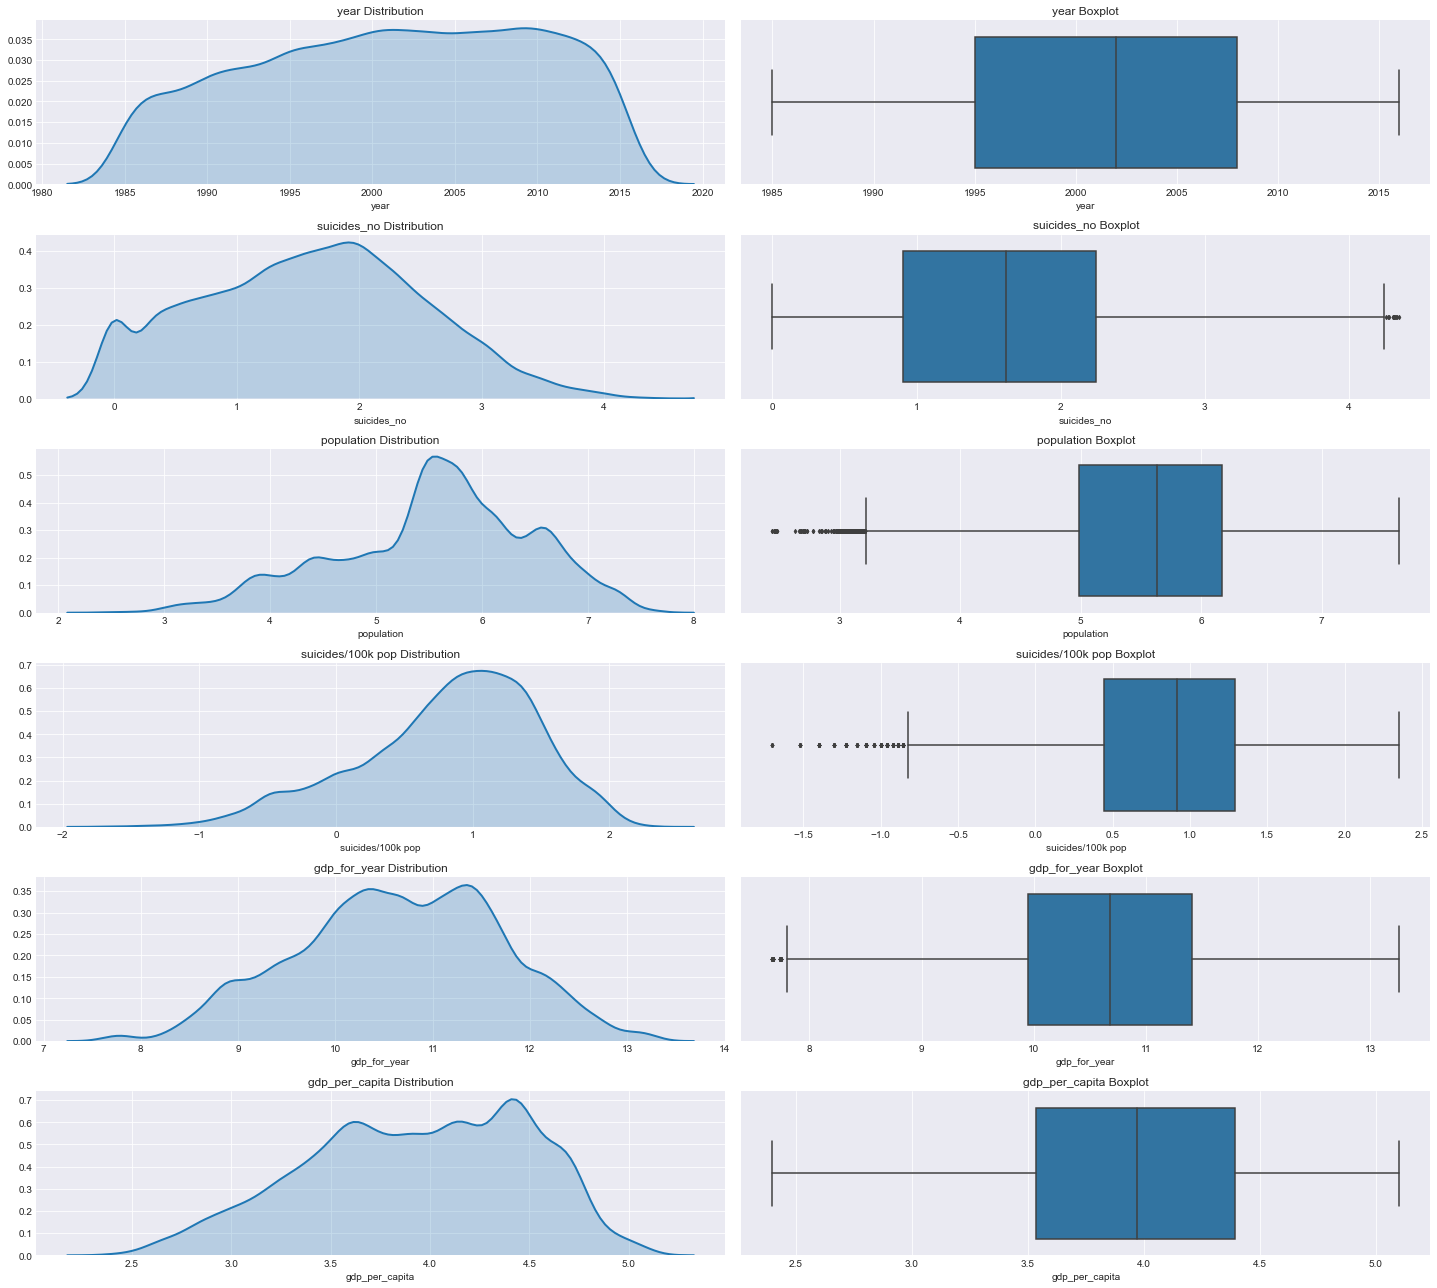

In [14]:
fig, ax = plt.subplots(6, 2, figsize = (20, 18))
rows = df.select_dtypes(exclude = "object").columns
for row in range(len(rows)):
    if df[rows[row]].skew() > 1:
        sns.distplot(np.log10(df[df[rows[row]] > 0][rows[row]]), hist = False, kde_kws = {"shade": True, "linewidth": 2}, ax = ax[row, 0])
        sns.boxplot(np.log10(df[df[rows[row]] > 0][rows[row]]), fliersize = 3, ax = ax[row, 1])
    else:
        sns.distplot(df[rows[row]], hist = False, kde_kws = {"shade": True, "linewidth": 2}, ax = ax[row, 0])
        sns.boxplot(df[rows[row]], fliersize = 3, ax = ax[row, 1])
    ax[row, 0].set_title(rows[row] + " Distribution")
    ax[row, 1].set_title(rows[row] + " Boxplot")
plt.tight_layout()
plt.show()

In [15]:
def ma_calculate(data, window = 1, min_periods = 1, thresholds = 2):
    mean = pd.DataFrame(data.rolling(window = window, min_periods = min_periods).mean())
    std = pd.DataFrame(data.rolling(window = window, min_periods = min_periods).std())
    upper_band= mean + thresholds * std
    lower_band= mean - thresholds * std
    anomaly_index = np.where((data > upper_band) | (data < lower_band))[0]
    return mean, std, upper_band, lower_band, anomaly_index

In [16]:
data_graph = pd.DataFrame(df.groupby("year").sum())
mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 5)

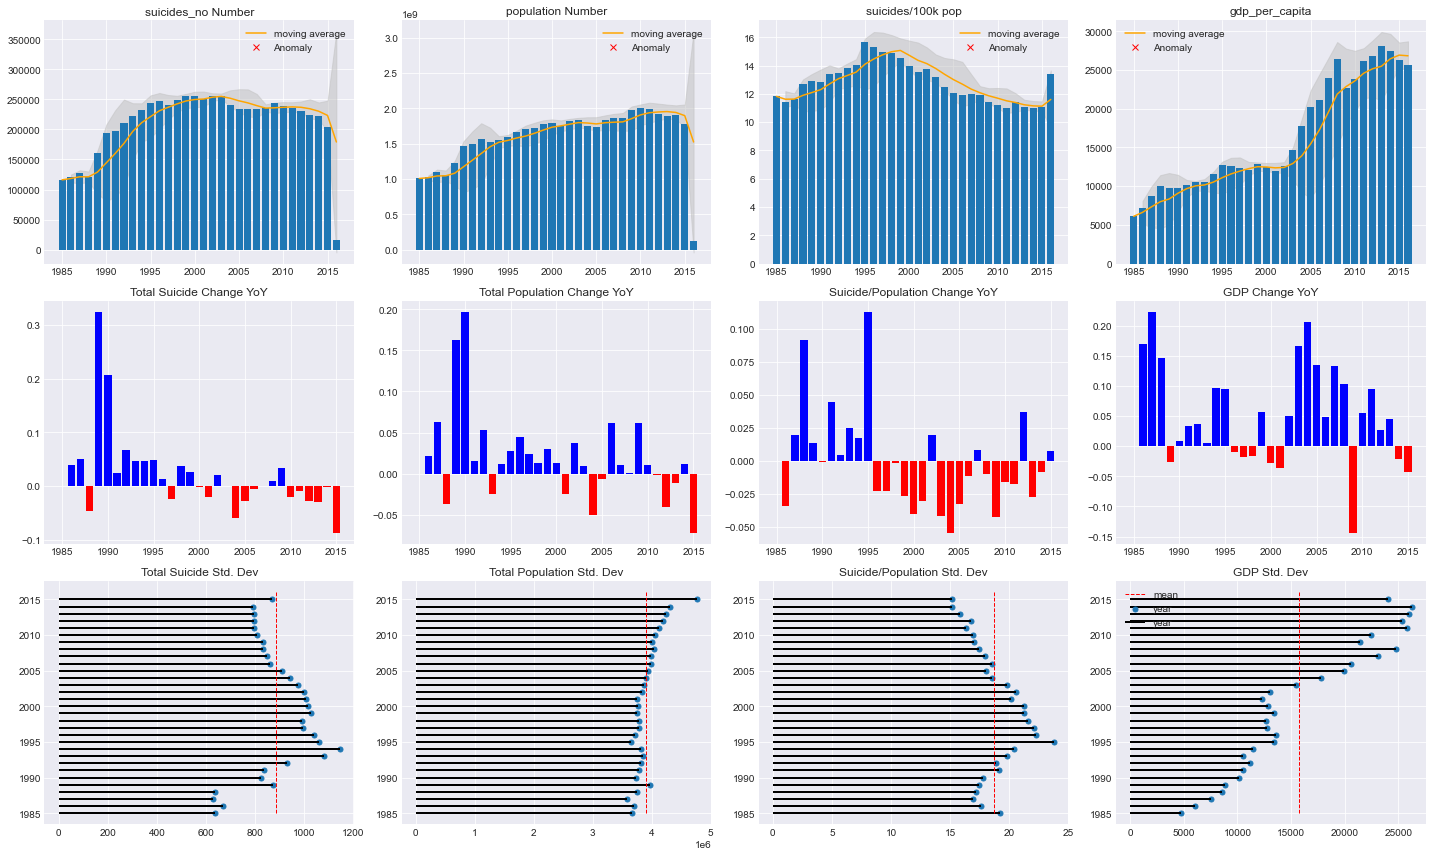

In [17]:
fig, ax = plt.subplots(3, 4, figsize = (20, 12))

columns = ["suicides_no", "population"]
for col in range(len(columns)):
    data_graph = pd.DataFrame(df.groupby("year").sum())
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 5)
    ax[0, col].bar(x = "year", height = columns[col], data = data_graph.reset_index())
    ax[0, col].plot(mean.index, mean[columns[col]], color = "orange", label = "moving average")
    ax[0, col].fill_between(x = mean.index, y1 = lower_band[columns[col]], y2 = upper_band[columns[col]], color = "silver", alpha = 0.5)
    ax[0, col].plot(data_graph[columns[col]].index[anomaly_index], data_graph[columns[col]].iloc[anomaly_index], "x", color="red", label="Anomaly")
    ax[0, col].legend()
    ax[0, col].set_title(columns[col] + " Number")

columns = ["suicides/100k pop", "gdp_per_capita"]
for col in range(len(columns)):    
    data_graph = pd.DataFrame(df.groupby("year").mean())
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 5)
    ax[0, col + 2].bar(x = "year", height = columns[col], data = data_graph.reset_index())
    ax[0, col + 2].plot(mean.index, mean[columns[col]], color = "orange", label = "moving average")
    ax[0, col + 2].fill_between(x = mean.index, y1 = lower_band[columns[col]], y2 = upper_band[columns[col]], color = "silver", alpha = 0.5)
    ax[0, col + 2].plot(data_graph[columns[col]].index[anomaly_index], data_graph[columns[col]].iloc[anomaly_index], "x", color="red", label="Anomaly")
    ax[0, col + 2].legend()
    ax[0, col + 2].set_title(columns[col])

data_graph = df[df["year"] < 2016].groupby("year").agg({"suicides_no": sum, "population": sum, "suicides/100k pop": "mean", "gdp_per_capita": "mean"}).reset_index()
data_graph["sui_diff"] = data_graph["suicides_no"].pct_change().fillna(0)
data_graph["pop_diff"] = data_graph["population"].pct_change().fillna(0)
data_graph["sui/pop_diff"] = data_graph["suicides/100k pop"].pct_change().fillna(0)
data_graph["gdp_diff"] = data_graph["gdp_per_capita"].pct_change().fillna(0)

columns = ["sui_diff", "pop_diff", "sui/pop_diff", "gdp_diff"]
for col in range(len(columns)):
    ax[1, col].bar(x = "year", height = columns[col], data = data_graph[data_graph[columns[col]] >= 0 ], color = "blue")
    ax[1, col].bar(x = "year", height = columns[col], data = data_graph[data_graph[columns[col]] < 0 ], color = "red")
    
data_graph = df[df["year"] < 2016].groupby("year").std().reset_index()
columns = ["suicides_no", "population", "suicides/100k pop", "gdp_per_capita"]
for col in range(len(columns)):
    ax[2, col].scatter(x = columns[col], y = "year", data = data_graph, s = 25)
    ax[2, col].hlines(y = "year", xmin = 0, xmax = columns[col], data = data_graph, lw = 2)
    ax[2, col].plot([data_graph[columns[col]].mean(), data_graph[columns[col]].mean()], [1985, 2016], label = "mean", ls = "--", color = "red", lw = 1)

ax[1, 0].set_title("Total Suicide Change YoY")
ax[1, 1].set_title("Total Population Change YoY")
ax[1, 2].set_title("Suicide/Population Change YoY")
ax[1, 3].set_title("GDP Change YoY")
ax[2, 0].set_title("Total Suicide Std. Dev")
ax[2, 1].set_title("Total Population Std. Dev")
ax[2, 2].set_title("Suicide/Population Std. Dev")
ax[2, 3].set_title("GDP Std. Dev")

plt.legend()
plt.tight_layout()
plt.show()

**BY SEX**

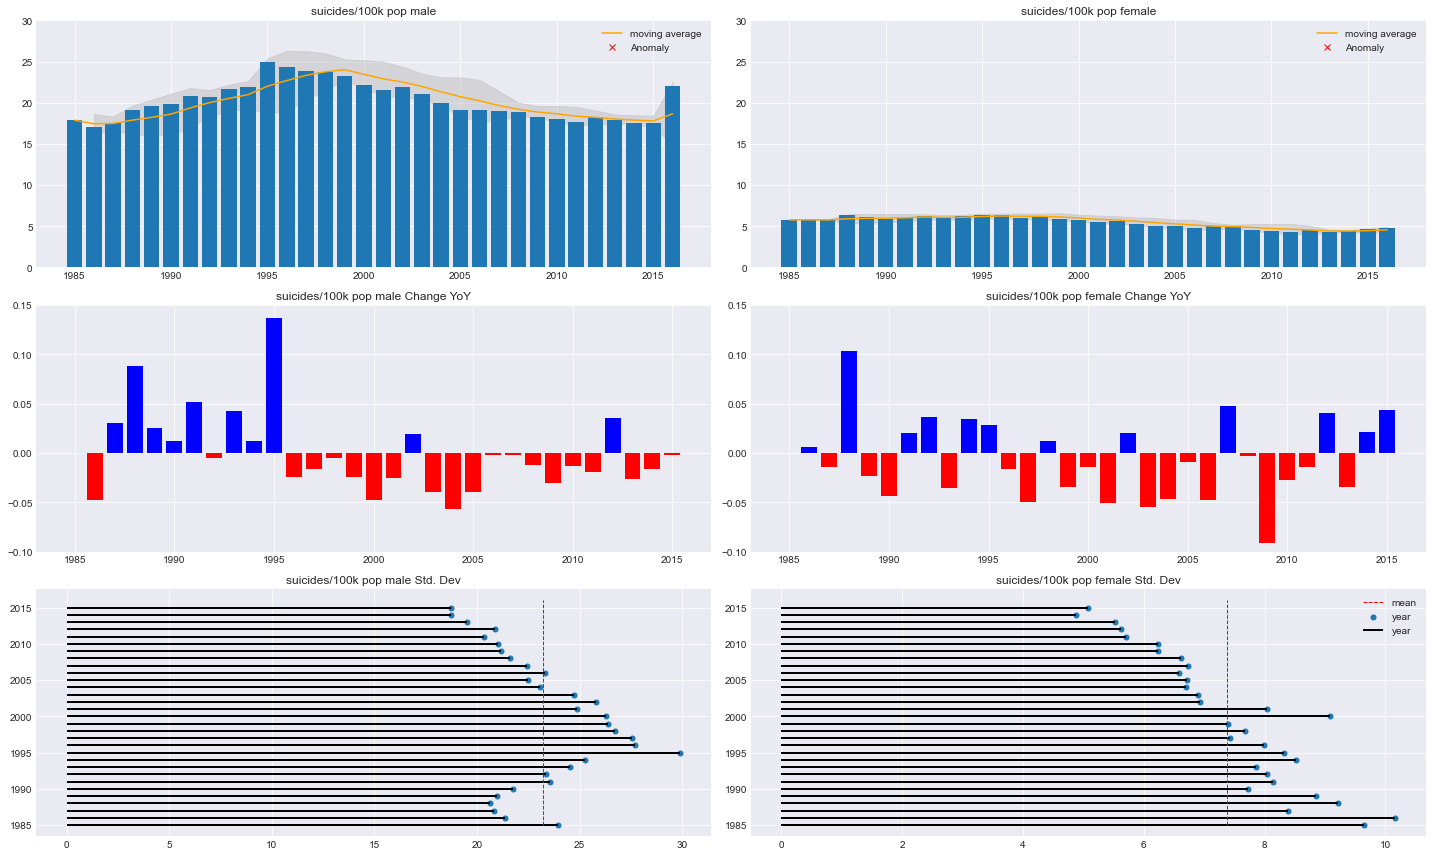

In [18]:
fig, ax = plt.subplots(3, 2, figsize = (20, 12))

columns = "suicides/100k pop"    
for i in range(2):
    data_graph = pd.DataFrame(df[df["sex"] == df["sex"].unique()[i]].groupby("year").mean())
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 5)
    ax[0, i].bar(x = "year", height = columns, data = data_graph.reset_index())
    ax[0, i].plot(mean.index, mean[columns], color = "orange", label = "moving average")
    ax[0, i].fill_between(x = mean.index, y1 = lower_band[columns], y2 = upper_band[columns], color = "silver", alpha = 0.5)
    ax[0, i].plot(data_graph[columns].index[anomaly_index], data_graph[columns].iloc[anomaly_index], "x", color="red", label="Anomaly")
    ax[0, i].legend()
    ax[0, i].set_title(columns + " " + df["sex"].unique()[i])
    ax[0, i].set_ylim(0, 30)

for i in range(2):
    data_graph = df[(df["year"] < 2016) & (df["sex"] == df["sex"].unique()[i])].groupby("year").agg({"suicides/100k pop": "mean"}).reset_index()
    data_graph["sui/pop_diff"] = data_graph["suicides/100k pop"].pct_change().fillna(0)
    columns = "sui/pop_diff"
    ax[1, i].bar(x = "year", height = columns, data = data_graph[data_graph[columns] >= 0 ], color = "blue")
    ax[1, i].bar(x = "year", height = columns, data = data_graph[data_graph[columns] < 0 ], color = "red")
    ax[1, i].set_ylim(-0.1, 0.15)
    
    data_graph = df[(df["year"] < 2016) & (df["sex"] == df["sex"].unique()[i])].groupby("year").std().reset_index()
    columns = "suicides/100k pop"
    ax[2, i].scatter(x = columns, y = "year", data = data_graph, s = 25)
    ax[2, i].hlines(y = "year", xmin = 0, xmax = columns, data = data_graph, lw = 2)
    ax[2, i].plot([data_graph[columns].mean(), data_graph[columns].mean()], [1985, 2016], label = "mean", ls = "--", color = "red", lw = 1)
    ax[1, i].set_title(columns + " " + df["sex"].unique()[i] + " Change YoY")
    ax[2, i].set_title(columns + " " + df["sex"].unique()[i] + " Std. Dev")

plt.legend()
plt.tight_layout()
plt.show()

**BY AGE**

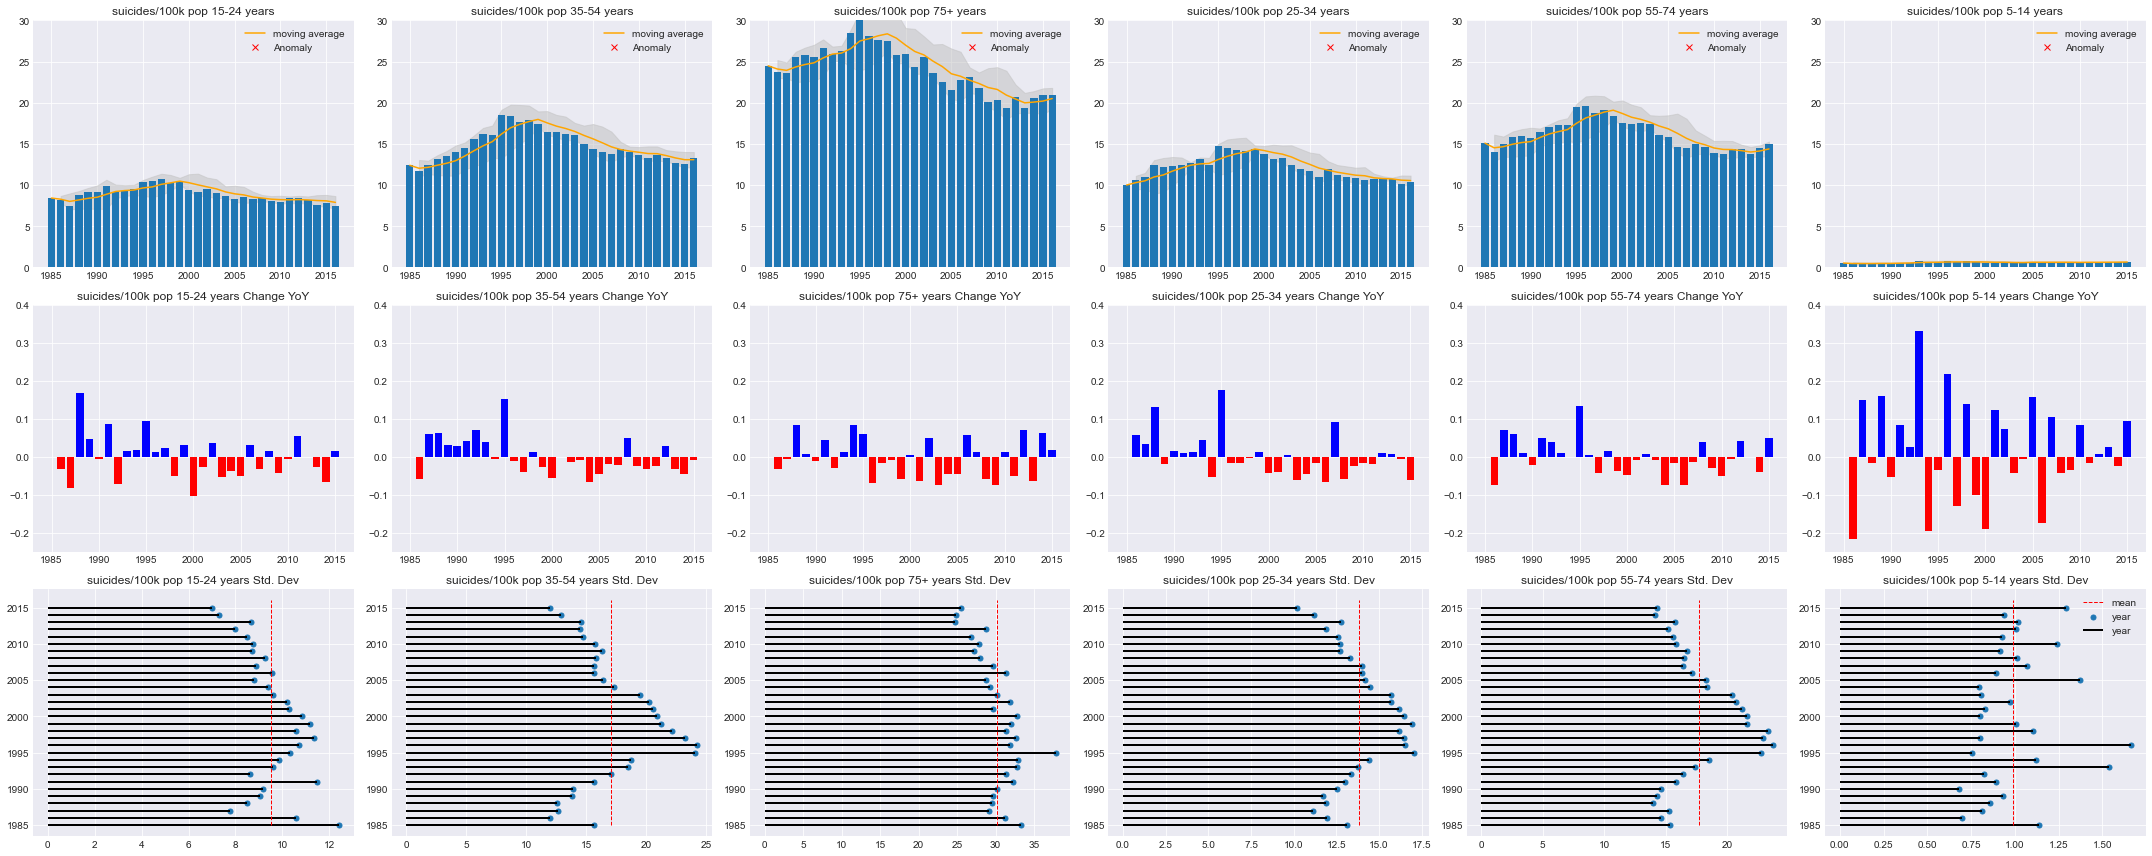

In [19]:
fig, ax = plt.subplots(3, 6, figsize = (30, 12))

columns = "suicides/100k pop"    
for i in range(6):
    data_graph = pd.DataFrame(df[df["age"] == df["age"].unique()[i]].groupby("year").mean())
    mean, std, upper_band, lower_band, anomaly_index = ma_calculate(data_graph, window = 5)
    ax[0, i].bar(x = "year", height = columns, data = data_graph.reset_index())
    ax[0, i].plot(mean.index, mean[columns], color = "orange", label = "moving average")
    ax[0, i].fill_between(x = mean.index, y1 = lower_band[columns], y2 = upper_band[columns], color = "silver", alpha = 0.5)
    ax[0, i].plot(data_graph[columns].index[anomaly_index], data_graph[columns].iloc[anomaly_index], "x", color="red", label="Anomaly")
    ax[0, i].legend()
    ax[0, i].set_title(columns + " " + df["age"].unique()[i])
    ax[0, i].set_ylim(0, 30)

for i in range(6):
    data_graph = df[(df["year"] < 2016) & (df["age"] == df["age"].unique()[i])].groupby("year").agg({"suicides/100k pop": "mean"}).reset_index()
    data_graph["sui/pop_diff"] = data_graph["suicides/100k pop"].pct_change().fillna(0)
    columns = "sui/pop_diff"
    ax[1, i].bar(x = "year", height = columns, data = data_graph[data_graph[columns] >= 0 ], color = "blue")
    ax[1, i].bar(x = "year", height = columns, data = data_graph[data_graph[columns] < 0 ], color = "red")
    ax[1, i].set_ylim(-0.25, 0.4)
    
    data_graph = df[(df["year"] < 2016) & (df["age"] == df["age"].unique()[i])].groupby("year").std().reset_index()
    columns = "suicides/100k pop"
    ax[2, i].scatter(x = columns, y = "year", data = data_graph, s = 25)
    ax[2, i].hlines(y = "year", xmin = 0, xmax = columns, data = data_graph, lw = 2)
    ax[2, i].plot([data_graph[columns].mean(), data_graph[columns].mean()], [1985, 2016], label = "mean", ls = "--", color = "red", lw = 1)
    ax[1, i].set_title(columns + " " + df["age"].unique()[i] + " Change YoY")
    ax[2, i].set_title(columns + " " + df["age"].unique()[i] + " Std. Dev")

plt.legend()
plt.tight_layout()
plt.show()

**COUNTRY**

In [20]:
growth_count = {}
country = df["country"].unique()
for co in country:
    data_graph = df.groupby(["country", "year"]).mean()["suicides/100k pop"].reset_index()
    growth = data_graph[data_graph["country"] == co]["suicides/100k pop"].pct_change()
    growth = growth[growth < np.inf].mean()
    growth_count[co] = growth

In [21]:
growth_count = pd.DataFrame(growth_count.values(), index = growth_count.keys(), columns = ["growth"])

In [22]:
growth_count = growth_count.reset_index()
growth_count.rename(columns = {"index": "country"}, inplace = True)
growth_count = growth_count.sort_values("growth")

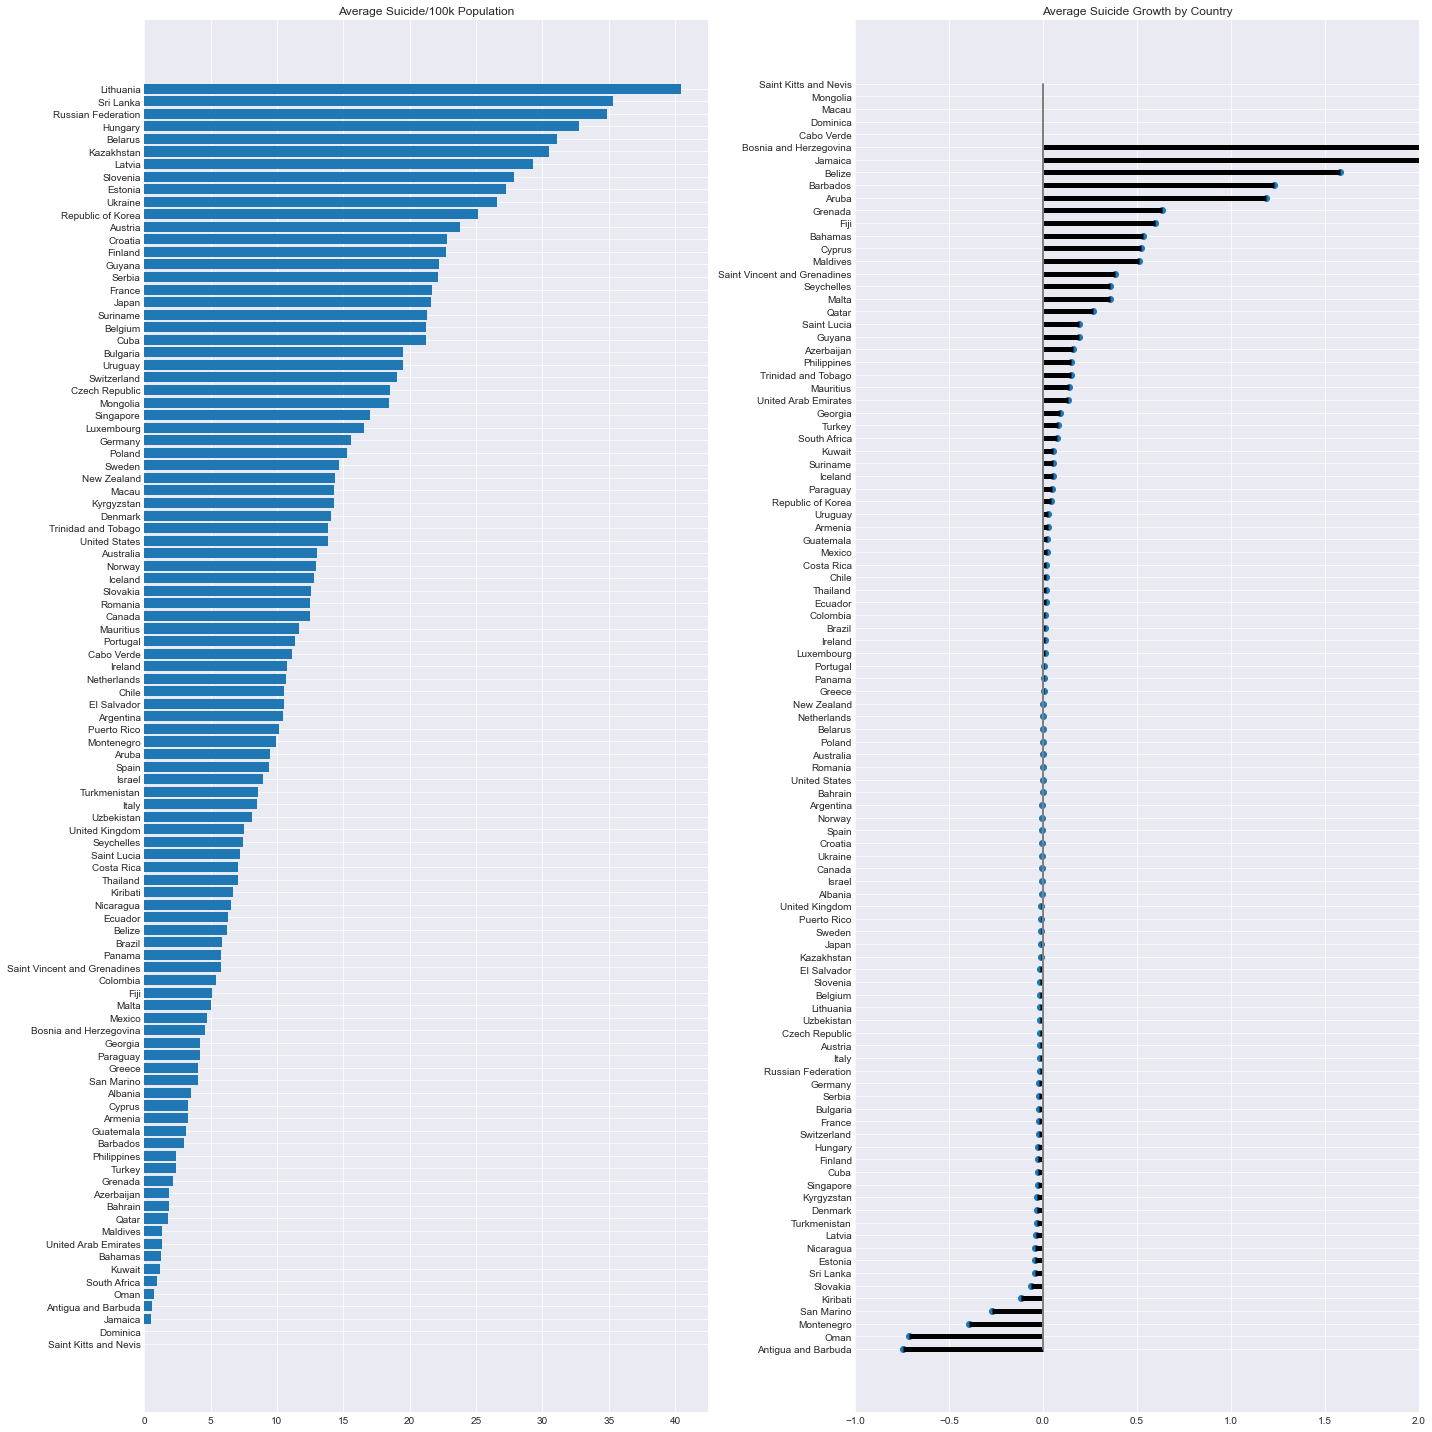

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (20, 20))
ax[0].barh(width = "suicides/100k pop", y = "country",
          data = df.groupby("country").mean().reset_index().sort_values("suicides/100k pop"))
ax[0].set_title("Average Suicide/100k Population")
ax[1].hlines(y = "country", xmin = 0, xmax = "growth", data = growth_count, lw = 5)
ax[1].scatter("growth", "country", data = growth_count, marker = "o")
ax[1].plot([0] * len(df["country"].unique()), range(len(df["country"].unique())), color = "gray", lw = 2)
ax[1].set_xlim(-1, 2)
ax[1].set_title("Average Suicide Growth by Country")
plt.tight_layout()
plt.show()

in this posisitioning, I took data from 2010 and I devide the countries into 4 sections.
- sec1 : The country who have low GDP and low number of suicide/100k population, ex Mexico
- sec2 : The country who have low GDP and high number of suicide/100k population, ex Suriname
- sec3 : The country who have high GDP and low number of suicide/100k population, ex Qatar
- sec4 : The country who have high GDP and high number of suicide/100k population, ex = Japan

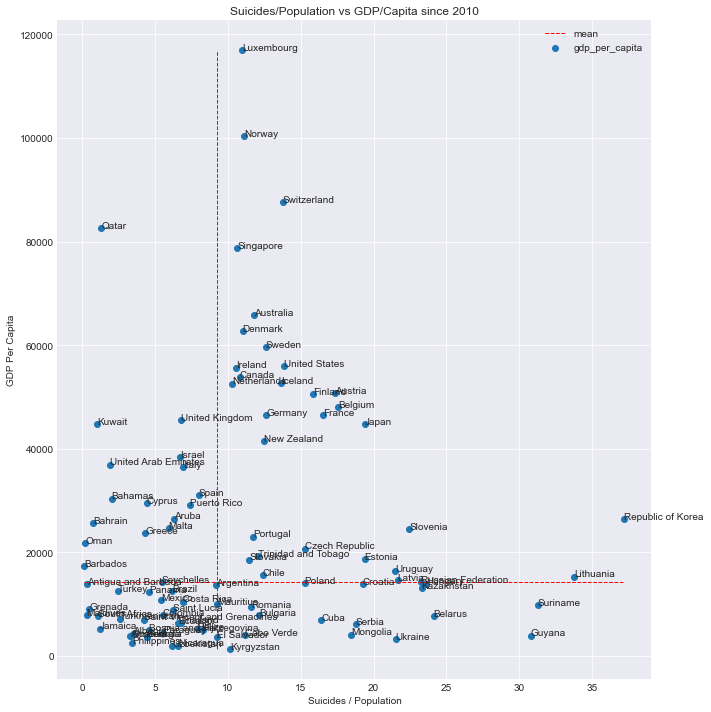

In [24]:
data_graph = df[df["year"] >= 2010].groupby("country").mean().reset_index()
plt.figure(figsize = (10, 10))
plt.scatter(x = "suicides/100k pop", y = "gdp_per_capita", data = data_graph)
plt.plot([data_graph["suicides/100k pop"].median(), data_graph["suicides/100k pop"].median()],
         [data_graph["gdp_per_capita"].min(), data_graph["gdp_per_capita"].max()],
         ls = "--", color = "red", lw = 1, label = "mean")
plt.plot([data_graph["suicides/100k pop"].min(), data_graph["suicides/100k pop"].max()],
         [data_graph["gdp_per_capita"].median(), data_graph["gdp_per_capita"].median()],
         ls = "--", color = "red", lw = 1)
for i, txt in enumerate(data_graph["country"].unique()):
        plt.annotate(txt, (data_graph["suicides/100k pop"].iloc[i], data_graph["gdp_per_capita"].iloc[i]), size = 10)
plt.legend()
plt.title("Suicides/Population vs GDP/Capita since 2010")
plt.xlabel("Suicides / Population")
plt.ylabel("GDP Per Capita")
plt.tight_layout()
plt.show()

In [25]:
data_graph = df.groupby(["year", "country"]).sum()[["suicides_no", "population"]].reset_index()
data_graph["sui_per_pop"] = data_graph["suicides_no"] / data_graph["population"] * 100000

year = sorted(data_graph["year"].unique())
new_data = pd.DataFrame()
for ye in year:
    rank_data = pd.DataFrame()
    rank_data = data_graph[data_graph["year"] == ye].copy()
    rank_data["rank"] = rank_data["sui_per_pop"].rank(ascending = False, method = "min")
    new_data = new_data.append(rank_data)

In [26]:
country_list = new_data[new_data["year"] == 2015].sort_values("rank")["country"].head(10)
new_data = new_data[(new_data["country"].isin(country_list)) & (new_data["year"].between(1995, 2015))]
new_data = new_data.sort_values(["country", "year"])

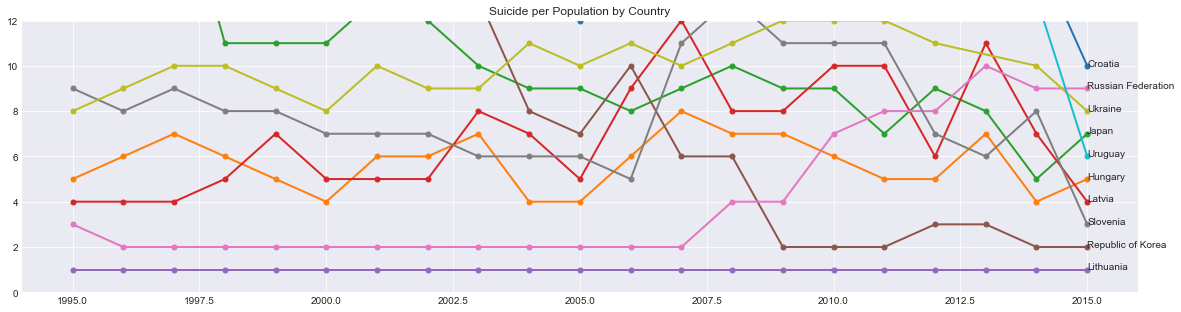

In [27]:
plt.figure(figsize = (20, 5))
country = new_data["country"].unique()
for co in country:
    plt.plot("year", "rank", data = new_data[new_data["country"] == co], marker = "o", lw = 2, ms = 5)
    plt.annotate(co, (2015, new_data[(new_data["country"] == co) & (new_data["year"] == 2015)]["rank"]), size = 10)
plt.ylim(0, 12)
plt.title("Suicide per Population by Country")
plt.show()

---
## **2. PREPARE THE DATA**
---

To create the clustering, I decide to minimize the data only country, year, suicides no, and population. I aggregated the data (SUM). For visualize the data, I transformed the data into 2 columns using PCA with dropped the country before transformed it.

In [28]:
columns = ["suicides_no", "population"]
data_graph = df.groupby(["country", "year"]).sum()[columns].reset_index()
data_graph["sui_per_pop"] = data_graph["suicides_no"] / data_graph["population"] * 100000
data_graph = data_graph.groupby("country").mean().reset_index()
data_graph = pd.merge(data_graph, growth_count, on = "country")
data_graph = data_graph.drop("year", axis = 1)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
X = data_graph.copy()
X= X.fillna(0)
X = X.drop("country", axis = 1).values

In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(X), columns = ["pc1", "pc2"])

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

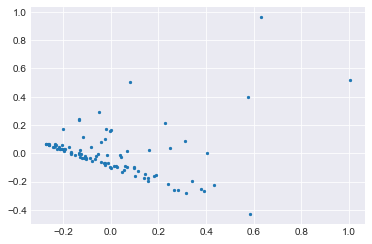

In [34]:
plt.scatter(x = "pc1", y = "pc2", data = X, s = 5)
plt.show()

In [35]:
data = X.values.copy()

In [36]:
# Algorithm
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS, Birch

# Model Selection
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Graph
from scipy.cluster.hierarchy import dendrogram

In [37]:
algorithm = {
    "KMeans": KMeans(),
    "Affinity Propagation": AffinityPropagation(random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False),
    "Spectral Clustering": SpectralClustering(),
    "Agglomerative Clustering": AgglomerativeClustering(),
    "DBSCAN": DBSCAN(),
    "OPTICS": OPTICS(),
    "Birch": Birch(threshold = 0.2),
}

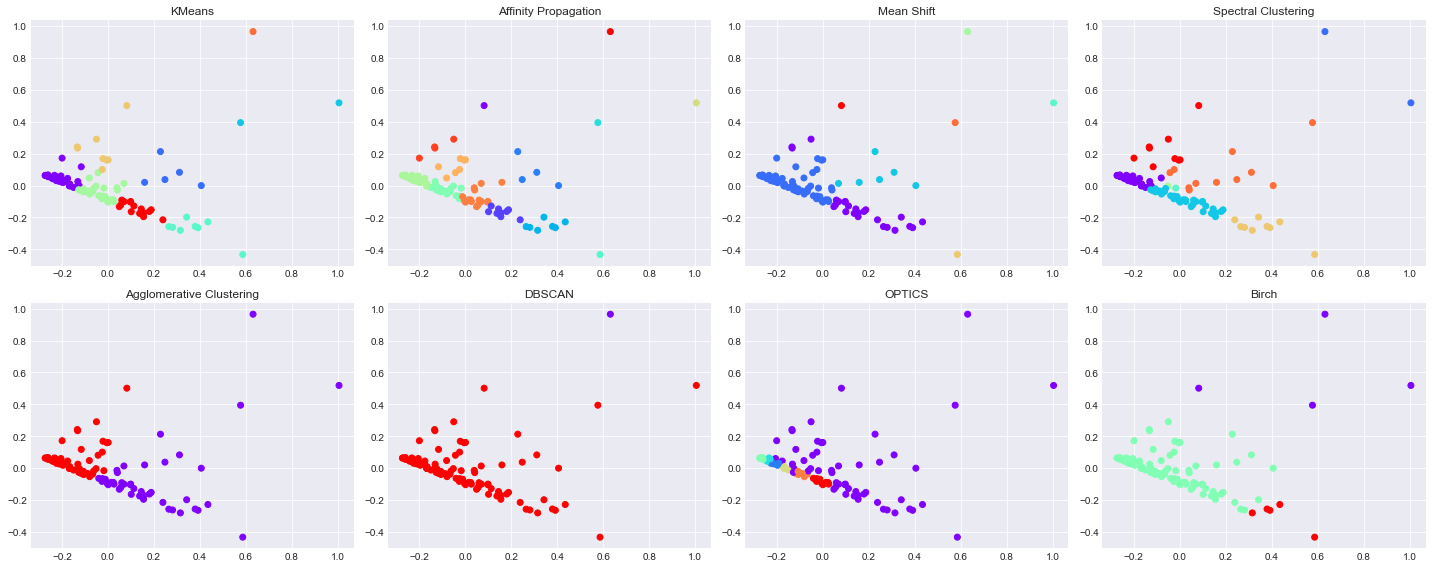

In [38]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()

In [39]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [40]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.461981,0.457398,0.425136,0.159777,0.452455,0.730018,0.037124,0.517516
Calinski,139.554180,202.477456,41.100990,59.112321,63.086632,18.987979,5.887411,51.184803
Davies,0.592434,0.449352,0.582679,0.937789,0.920395,0.181382,1.197270,0.594686


**KMEANS**

In [41]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = KMeans(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
    inertia.append(model.inertia_)

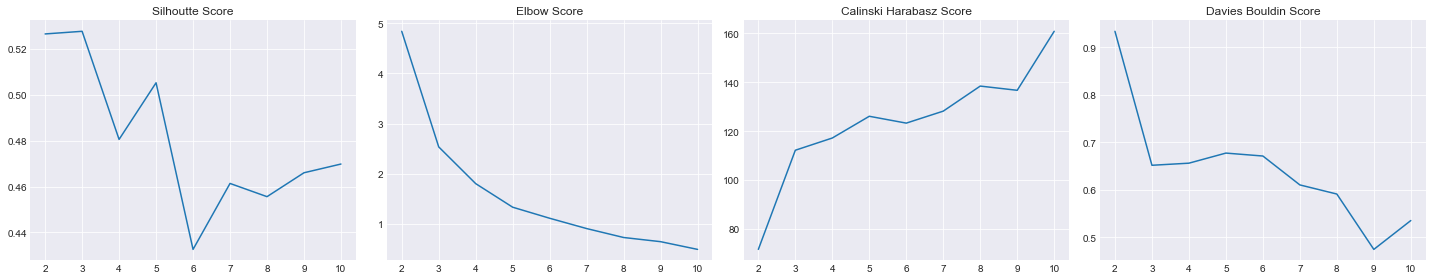

In [42]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
sns.lineplot(x = range(2, 11), y = inertia, ax = ax[1]); ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AFFINITY PROPAGATION**

In [43]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.8, 0.9, 10)):
    model = AffinityPropagation(damping = clu, random_state = 0)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))

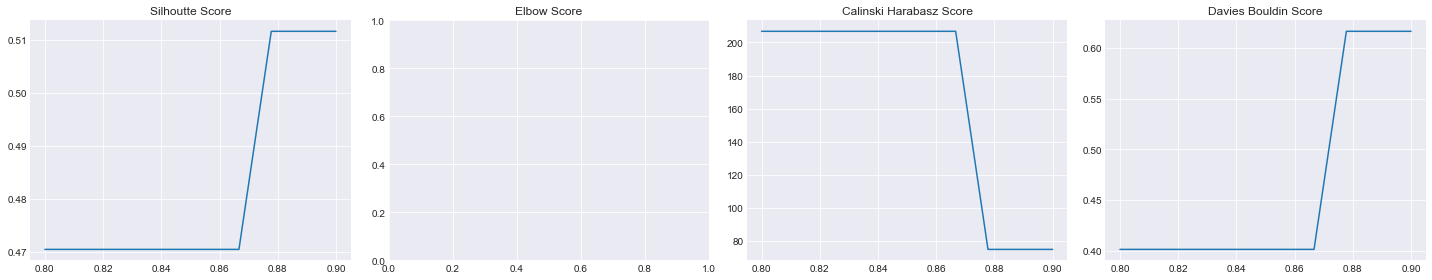

In [44]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.8, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**MEAN SHIFT**

In [45]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.5, 0.9, 10)):
    model = MeanShift(cluster_all = False, bandwidth = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

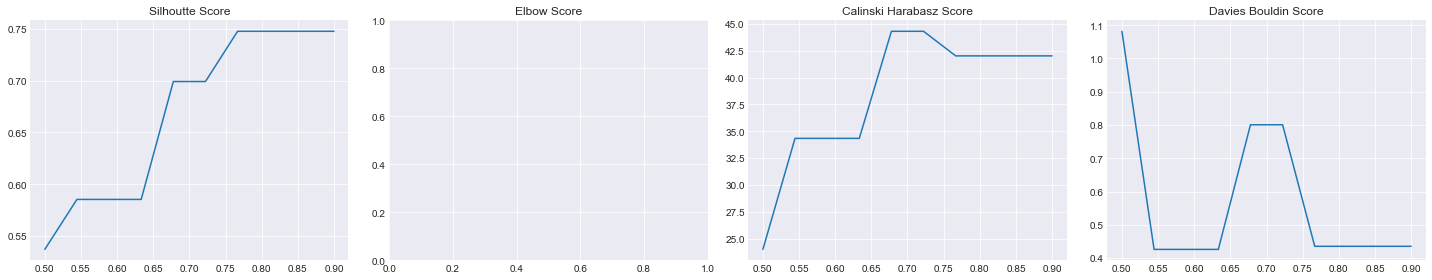

In [46]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.5, 0.9, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**SPECTRAL CLUSTERING**

In [47]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = SpectralClustering(n_clusters = clu, n_neighbors = clu * 2)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

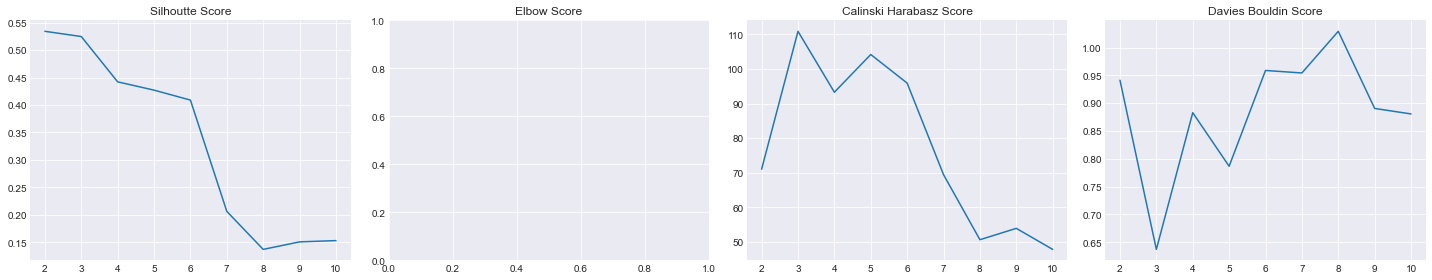

In [48]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**AGGLOMERATIVE CLUSTERING**

In [49]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = AgglomerativeClustering(n_clusters = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

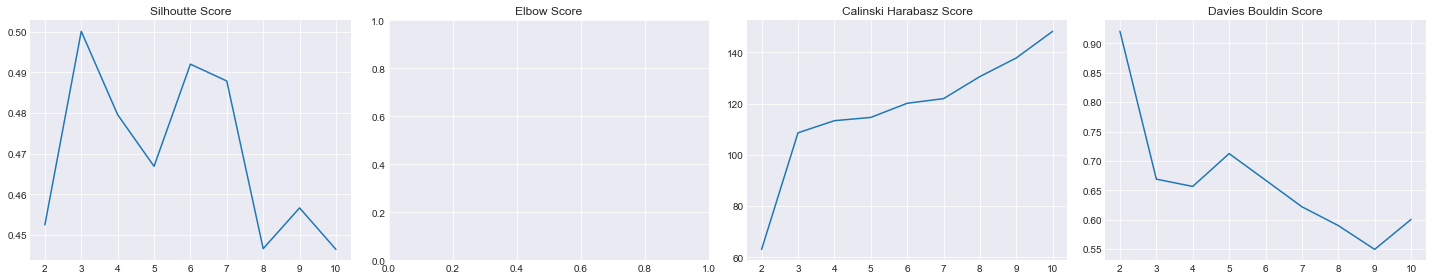

In [50]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

In [51]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

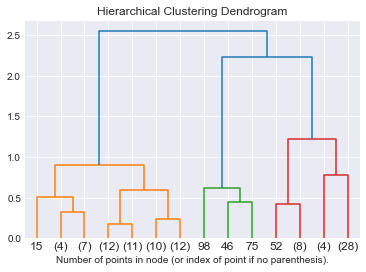

In [52]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
model.fit(data)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode = 'level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**DBSCAN**

In [53]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(0.1, 0.5, 6)):
    model = DBSCAN(eps = clu)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

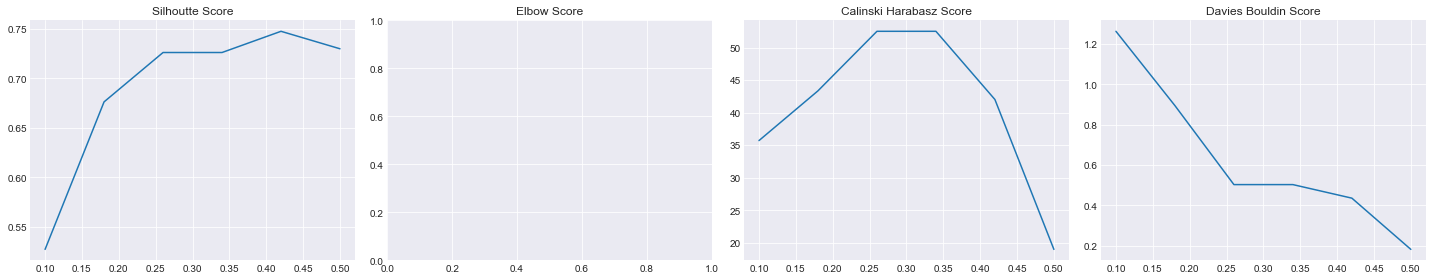

In [54]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 0.5, 6)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**OPTICS**

In [55]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in list(np.linspace(1, 10, 10)):
    model = OPTICS(eps = clu, leaf_size = clu * 10)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

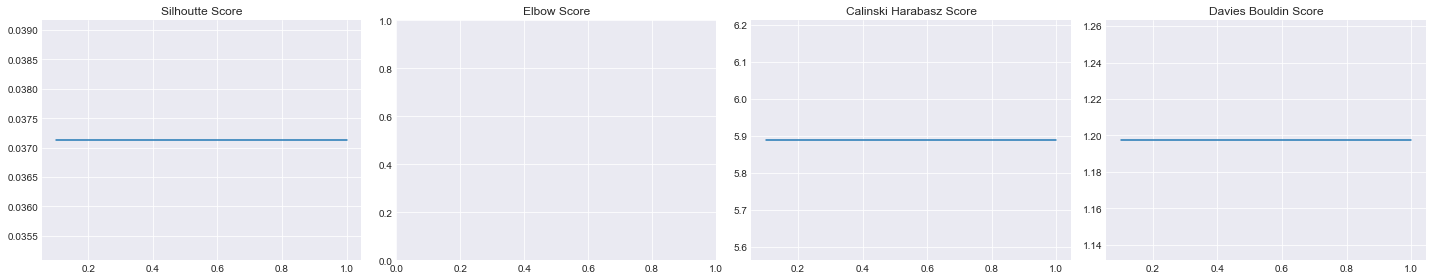

In [56]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = list(np.linspace(0.1, 1, 10)), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**BIRCH**

In [57]:
sil_sc = []
inertia = []
cal_sc = []
dav_sc = []
for clu in range(2, 11):
    model = Birch(n_clusters = clu, threshold = 0.1)
    model.fit(data)
    sil_sc.append(silhouette_score(data, model.labels_))
    cal_sc.append(calinski_harabasz_score(data, model.labels_))
    dav_sc.append(davies_bouldin_score(data, model.labels_))
#     inertia.append(model.inertia_)

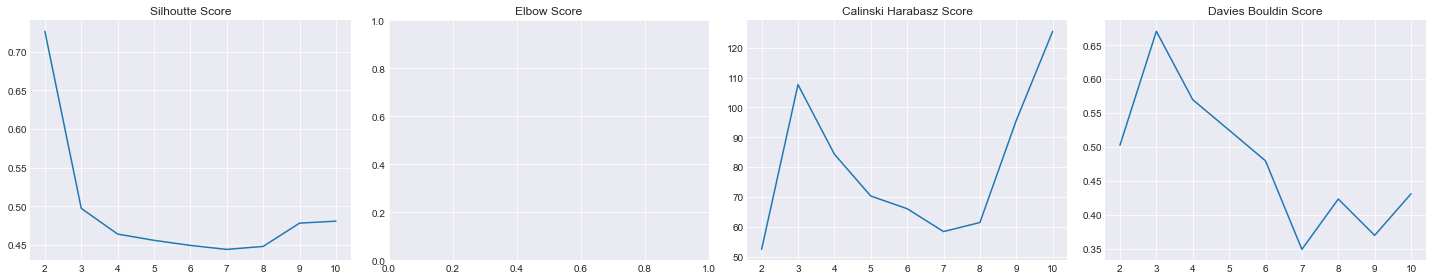

In [58]:
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.lineplot(x = range(2, 11), y = sil_sc, ax = ax[0]); ax[0].set_title("Silhoutte Score")
ax[1].set_title("Elbow Score")
sns.lineplot(x = range(2, 11), y = cal_sc, ax = ax[2]); ax[2].set_title("Calinski Harabasz Score")
sns.lineplot(x = range(2, 11), y = dav_sc, ax = ax[3]); ax[3].set_title("Davies Bouldin Score")
plt.tight_layout()
plt.show()

**FINAL CHECK**

In [59]:
algorithm = {
    "KMeans": KMeans(n_clusters = 5),
    "Affinity Propagation": AffinityPropagation(damping = 0.86, random_state = 0),
    "Mean Shift": MeanShift(cluster_all = False, bandwidth = 0.75),
    "Spectral Clustering": SpectralClustering(n_clusters = 3, n_neighbors = 6),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters = 6),
    "DBSCAN": DBSCAN(eps = 0.35),
    "OPTICS": OPTICS(),
    "Birch": Birch(n_clusters = 3, threshold = 0.1)
}

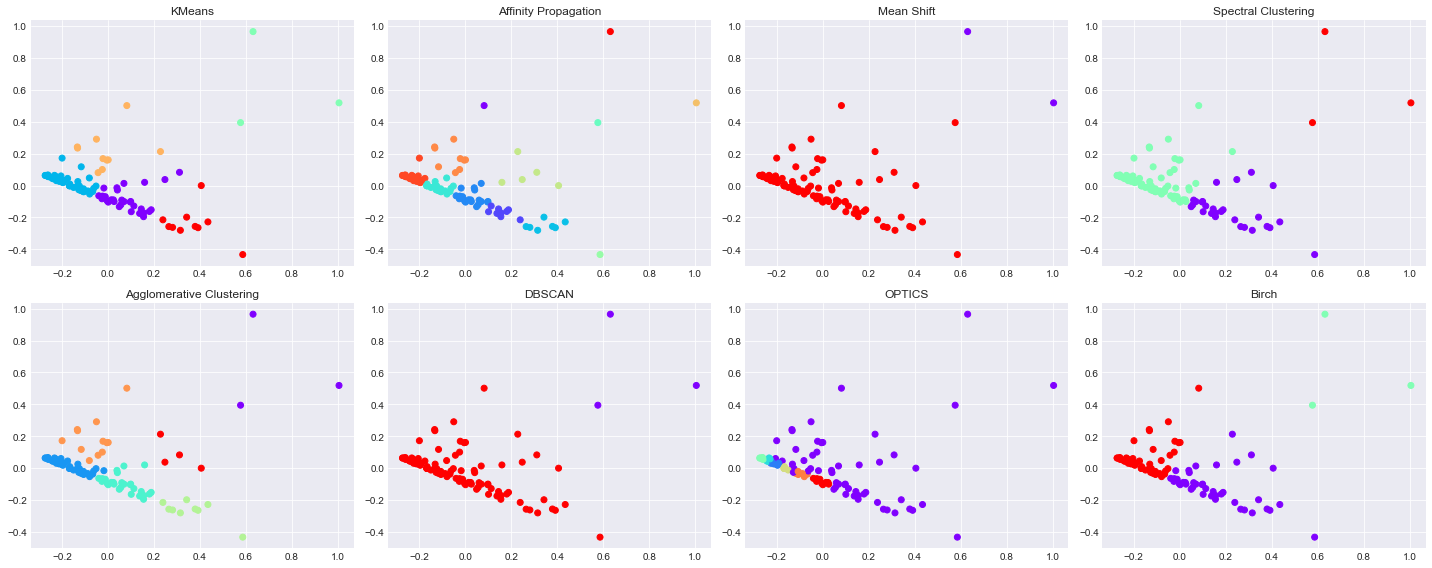

In [60]:
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
columns = list(algorithm.keys())
for row in range(2):
    for col in range(4):
        model = algorithm[columns[(row * 4) + col]]
        model.fit(data)
        data_graph = pd.concat([pd.DataFrame(data, columns = ["p1", "p2"]), pd.DataFrame(model.labels_, columns = ["Clustering_Score"])], axis = 1)
        ax[row, col].scatter(x = "p1", y = "p2", data = data_graph, c = "Clustering_Score", cmap = "rainbow")
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()
fig.savefig('data_clustering_mall_cust.png')

In [61]:
final_score = {}
columns = list(algorithm.keys())
for col in columns:
    score = {}
    model = algorithm[col]
    model.fit(data)
    y_pred = model.fit_predict(data)
    score["Silhoutte_Score"] = silhouette_score(data, model.labels_)
    score["Calinski"] = calinski_harabasz_score(data, y_pred)
    score["Davies"] = davies_bouldin_score(data, y_pred)
    final_score[col] = score

In [62]:
pd.DataFrame(final_score)

,KMeans,Affinity Propagation,Mean Shift,Spectral Clustering,Agglomerative Clustering,DBSCAN,OPTICS,Birch
Silhoutte_Score,0.505262,0.470445,0.747691,0.524619,0.492016,0.726248,0.037124,0.497213
Calinski,126.106981,206.756955,42.018383,110.882284,120.151019,52.499319,5.887411,107.618746
Davies,0.677426,0.401429,0.435499,0.637162,0.667415,0.502714,1.197270,0.670531
